In [1]:
import pandas as pd 
import numpy as np
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('enron_emails.csv')

In [5]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)
    return text

# Define the remove stop words function
def remove_stop_words(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_tokens)

# Apply the cleaning functions
data['email'] = data['email'].apply(clean_text).apply(remove_stop_words)

data.head()

,email,label
0,subject rankings thank,ham
1,subject visit enron vince dec 29 9 00 fine tal...,ham
2,subject research group 19 th floor hello case ...,ham
3,subject christmas baskets christmas baskets or...,ham
4,subject japan candidate vince spoke whalley sa...,ham


In [7]:
#TF-IDF

X = data['email']
y = data['label']

#The model we will need to evaluate in train, test, validation set. 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [8]:
feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# Display the first few rows of the DataFrame
tfidf_df

,00,000,01,02,03,04,05,08,09,10,...,trading,university,use,vince,visit,want,week,work,www,year
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.457524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.414047,0.270981,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.144421,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.224119,0.000000,0.0,0.372790,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
5850,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.294835,0.0,0.0,0.0
5851,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
5852,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.284410,0.0,0.0,0.0


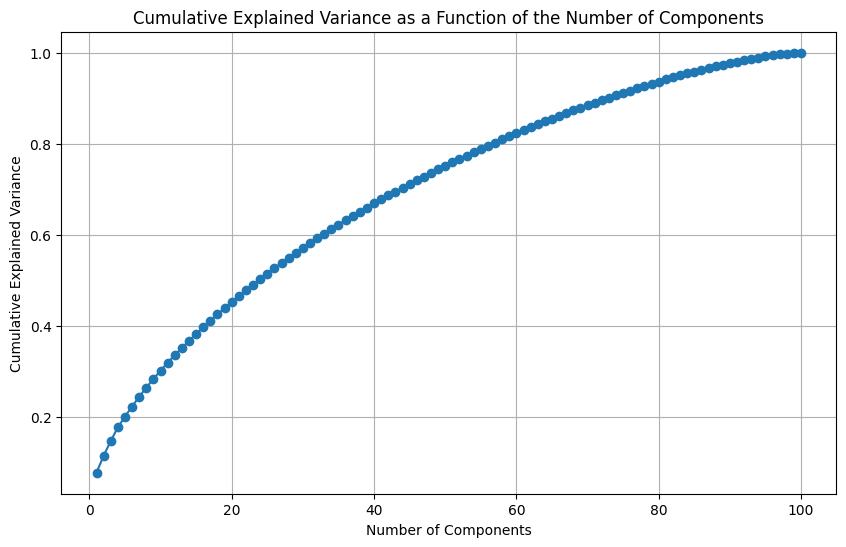

In [9]:
pca = PCA().fit(X_tfidf.toarray())

# Calculate cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

Take up to PC 64 to get to 85% variance explained
Take up to PC 72 to get to 90% variance explained


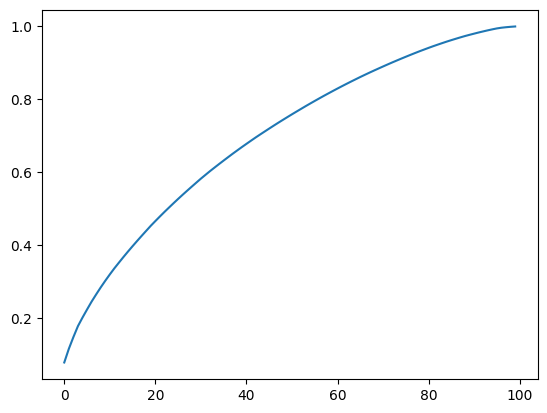

In [10]:
#Find number of PC's that account for 85% and 90% of variance
var_exp_threshs = [85, 90]

total_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.plot(total_var_exp)

for var_exp_thresh in var_exp_threshs:
    pcindex = np.where(total_var_exp >= var_exp_thresh / 100)[0]
    print(f'Take up to PC {pcindex[0]} to get to {var_exp_thresh}% variance explained')

data_pc_85 = data.iloc[:, :71]
data_pc_90 = data.iloc[:, :79]

In [12]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

# Assuming df is your DataFrame containing 'TF-IDF Features' (already transformed) 
# and 'Label' columns, and 'PCA Components' (with 100 components) stored in the DataFrame
# Example DataFrame creation:
# df = pd.DataFrame({'TF-IDF Features': tfidf_features, 'Label': labels})

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define parameters for grid search
parameters = {
    'clf__n_estimators': [50, 100, 200], # Random Forest parameters to tune
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(data_pc_85['email'], data_pc_85['label'], test_size=0.2, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(data_pc_90['email'], data_pc_90['label'], test_size=0.2, random_state=42)


# Perform grid search
grid_search_85 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_85.fit(X_train_85, y_train_85)

grid_search_90 = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search_90.fit(X_train_90, y_train_90)


# Print the best parameters and best score
print("Best parameters found 70 PC's:")
print(grid_search_85.best_params_)
print("Best score with 70 PC's:")
print(grid_search_85.best_score_)

print("Best parameters found 78 PC's:")
print(grid_search_90.best_params_)
print("Best score with 78 PC's:")
print(grid_search_90.best_score_)


y_pred_85 = grid_search_85.predict(X_test_85)
y_pred_90 = grid_search_90.predict(X_test_90)

# Evaluate the model
accuracy_85 = accuracy_score(y_test_85, y_pred_85)
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Test Accuracy with 70 PC's}:", accuracy_85)
print("\nClassification Report for 70 PC's:")
print(classification_report(y_test_85, y_pred_85))
print("Test Accuracy with 78 PC's}:", accuracy_90)
print("\nClassification Report for 78 PC's:")
print(classification_report(y_test_90, y_pred_90))

Best parameters found 70 PC's:
{'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best score with 70 PC's:
0.9801402913462679
Best parameters found 78 PC's:
{'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best score with 78 PC's:
0.9801402913462679
Test Accuracy with 70 PC's}: 0.9897523484201537

Classification Report for 70 PC's:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       863
        spam       1.00      0.96      0.98       308

    accuracy                           0.99      1171
   macro avg       0.99      0.98      0.99      1171
weighted avg       0.99      0.99      0.99      1171

Test Accuracy with 78 PC's}: 0.9888983774551665

Classification Report for 78 PC's:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       863
        spam       1.00      0.96      0.98       308

    accuracy                   

In [13]:
pca = PCA(n_components=70)  # Adjust n_components based on desired variance to keep
X_pca = pca.fit_transform(X_tfidf.toarray())

# Apply GMM
gmm = GaussianMixture(n_components=2, random_state=42, covariance_type='full')  # Adjust n_components based on expected clusters
gmm.fit(X_pca)
cluster_labels = gmm.predict(X_pca)

# Add cluster labels to your dataframe
data['cluster_label'] = cluster_labels
data.head()

,email,label,cluster_label
0,subject rankings thank,ham,1
1,subject visit enron vince dec 29 9 00 fine tal...,ham,0
2,subject research group 19 th floor hello case ...,ham,0
3,subject christmas baskets christmas baskets or...,ham,1
4,subject japan candidate vince spoke whalley sa...,ham,1


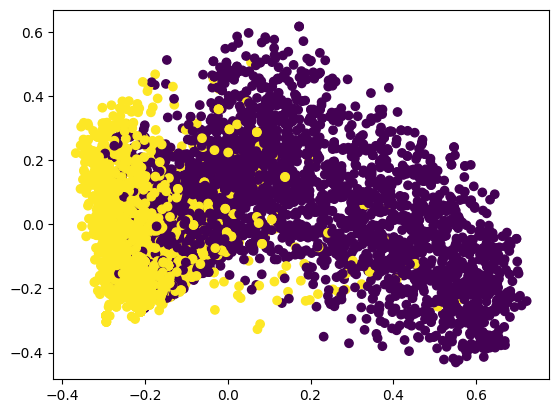

In [14]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')

In [15]:
from sklearn.metrics import adjusted_rand_score

# Assuming labels_true and labels_pred are the true labels and predicted labels, respectively
ari_score = adjusted_rand_score(data['label'], cluster_labels)

print("Adjusted Rand Index Score:", ari_score)

silhouette = silhouette_score(X_pca,cluster_labels) 
silhouette

Adjusted Rand Index Score: 0.48915977597932075


NameError: name 'silhouette_score' is not defined